In [1]:
#Packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#Reading the csv files
bank_additional_full_df=pd.read_csv('data/bank-additional-full.csv',sep=';')
# bank_additional_df=pd.read_csv('data/bank-additional/bank-additional.csv',sep=';')
# bank_full_df=pd.read_csv('data/bank/bank-full.csv',sep=';')
# bank_df=pd.read_csv('data/bank/bank.csv',sep=';')

In [3]:
#Columns information
bank_additional_full_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
#size
bank_additional_full_df.shape

(41188, 21)

In [5]:
#Info
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
#Describe
bank_additional_full_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
bank_additional_full_df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
#Checking for null value
bank_additional_full_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# Feature Engineering
bank_additional_full_df.drop(['contact','month','day_of_week', 'contact'],axis=1,inplace=True)
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
bank_additional_full_df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)


In [11]:

#Describing dummy keys of particular column
y_n_lookup ={'yes' : 1, 'no' : 0}
bank_additional_full_df['y'] = bank_additional_full_df['y'].map(lambda x: y_n_lookup[x])
bank_additional_full_df.head()


,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


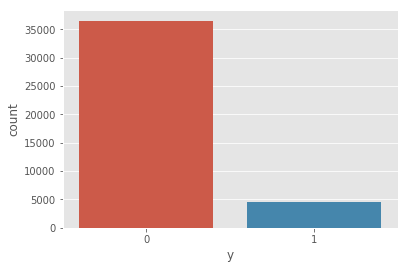

In [12]:
sns.countplot(x='y', data= bank_additional_full_df)

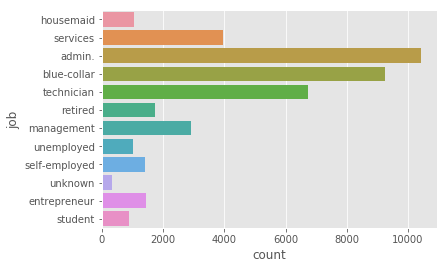

In [13]:
sns.countplot(y='job', data=bank_additional_full_df)

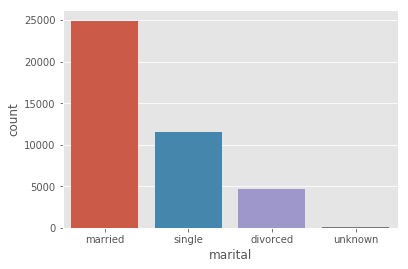

In [14]:
sns.countplot(x='marital', data=bank_additional_full_df)


In [15]:
bank_additional_full_df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

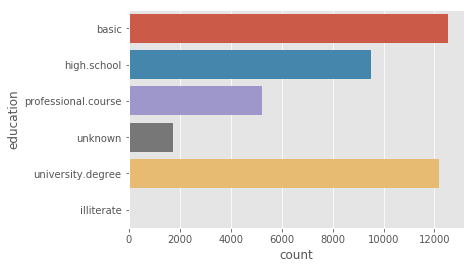

In [16]:
sns.countplot(y='education', data=bank_additional_full_df)

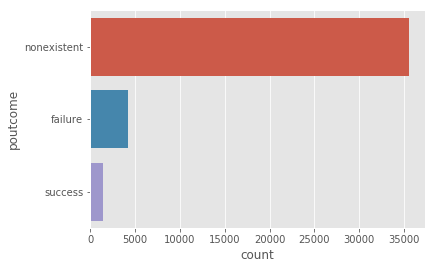

In [17]:
sns.countplot(y='poutcome', data=bank_additional_full_df)

In [18]:
bank_additional_full_df.head()


,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1

In [19]:
le = preprocessing.LabelEncoder()

In [20]:
bank_additional_full_df.job = le.fit_transform(bank_additional_full_df.job) 
bank_additional_full_df.marital = le.fit_transform(bank_additional_full_df.marital)
bank_additional_full_df.education = le.fit_transform(bank_additional_full_df.education)
bank_additional_full_df.housing = le.fit_transform(bank_additional_full_df.housing)
bank_additional_full_df.loan = le.fit_transform(bank_additional_full_df.loan)
bank_additional_full_df.poutcome = le.fit_transform(bank_additional_full_df.poutcome)

bank_additional_full_df.default = le.fit_transform(bank_additional_full_df.default) 

bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,1,0,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,0,2,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,0,2,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [21]:
bank_additional_full_df.shape

(41188, 18)

In [22]:
X = bank_additional_full_df.iloc[:,0:-1]
X[0:10]

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,1,1,0,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,1,0,2,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,0,0,0,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,1,0,0,2,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
5,45,7,1,0,1,0,0,198,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
6,59,0,1,3,0,0,0,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
7,41,1,1,5,1,0,0,217,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
8,24,9,2,3,0,2,0,380,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
9,25,7,2,1,0,2,0,50,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [23]:
y = bank_additional_full_df.iloc[:,17]
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

In [24]:
# Train and Test split 

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state= 42) #80/20 split


In [25]:
x_train.shape, y_train.shape


((32950, 17), (32950,))

In [26]:
y_train.head()

12556    0
35451    0
30592    0
17914    0
3315     0
Name: y, dtype: int64

In [27]:
x_test.shape, y_test.shape


((8238, 17), (8238,))

In [74]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim=17, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 50)                900       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 951
Trainable params: 951
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [76]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)



In [77]:
history = model.fit(np.array(x_train_keras), np.array(y_train_keras), validation_split=0.2, nb_epoch= 20, batch_size=128, verbose=2, shuffle=True)


# history = model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True)


C:\Users\hoanganh\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 26360 samples, validate on 6590 samples
Epoch 1/20
 - 1s - loss: 0.4141 - acc: 0.8066 - val_loss: 0.2977 - val_acc: 0.8853
Epoch 2/20
 - 1s - loss: 0.2769 - acc: 0.8893 - val_loss: 0.2812 - val_acc: 0.8894
Epoch 3/20
 - 1s - loss: 0.2654 - acc: 0.8961 - val_loss: 0.2738 - val_acc: 0.8923
Epoch 4/20
 - 1s - loss: 0.2579 - acc: 0.8972 - val_loss: 0.2668 - val_acc: 0.8948
Epoch 5/20
 - 1s - loss: 0.2588 - acc: 0.8975 - val_loss: 0.2664 - val_acc: 0.8894
Epoch 6/20
 - 0s - loss: 0.2562 - acc: 0.9016 - val_loss: 0.2692 - val_acc: 0.9008
Epoch 7/20
 - 0s - loss: 0.2596 - acc: 0.9011 - val_loss: 0.2675 - val_acc: 0.8921
Epoch 8/20
 - 0s - loss: 0.2563 - acc: 0.8994 - val_loss: 0.2707 - val_acc: 0.9012
Epoch 9/20
 - 0s - loss: 0.2563 - acc: 0.9019 - val_loss: 0.2690 - val_acc: 0.8967
Epoch 10/20
 - 1s - loss: 0.2540 - acc: 0.8978 - val_loss: 0.2627 - val_acc: 0.8895
Epoch 11/20
 - 0s - loss: 0.2520 - acc: 0.9010 - val_loss: 0.2668 - val_acc: 0.8976
Epoch 12/20
 - 0s - loss: 0.2513 - a

In [78]:
scores = model.evaluate(np.array(x_test), np.array(y_test))


8238/8238 [==============================] - 0s 28us/step


In [79]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



acc: 90.69%


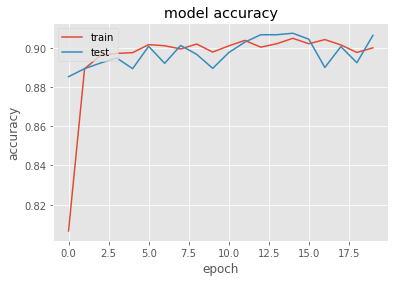

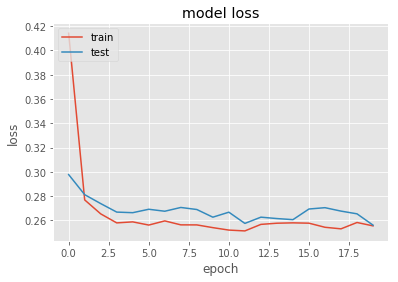

In [80]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left' )
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [81]:
# prediction=clf.predict(x_test)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, prediction)

In [ ]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test, prediction)
# print(confusion_matrix)

In [ ]:
# import graphviz

# dot_data = tree.export_graphviz(
#     clf,
#     out_file=None, 
#     feature_names= x_train.columns,  
#     class_names = ['no','yes'],  
#     filled=True, 
#     rounded=True,  
#     special_characters=True
# )  
# graph = graphviz.Source(dot_data)  
# graph 

In [ ]:
# import pandas as pd
# feature_importances = pd.DataFrame(clf.feature_importances_,
#                                    index = x_train.columns,
#                                    columns=['importance']).sort_values('importance',ascending=False)



In [ ]:
# feature_importances 